----
Objectif :
+ La création d’un modèle KNN pour un problème de classification multi-class.
+ La sélection des bons hyperparamètres (le k et la distance)
+ l’évaluation du modèle
#
----

In [1]:
import pandas as pd

In [28]:
pip install python-mnist

You should consider upgrading via the 'C:\Users\asus\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    dowload=True,n
    transform=ToTensor()
)

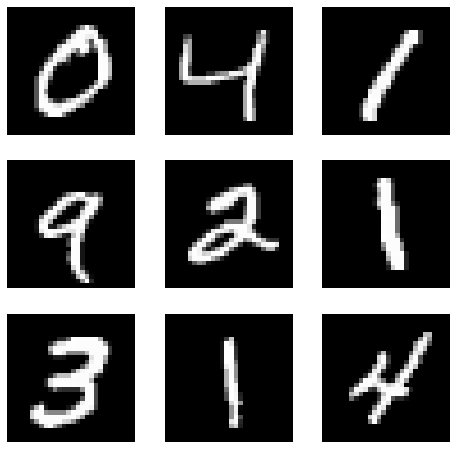

In [3]:
figure = plt.figure(figsize=(8, 8))

for i in range(1, 10):
    figure.add_subplot(3, 3, i)
    plt.axis("off")
    plt.imshow(training_data.data[i], cmap="gray")
plt.show()

In [4]:
import numpy as np
train_data = pd.DataFrame(training_data.data.reshape(60000,28*28).numpy())
train_data = train_data[:20000]
train_target = pd.DataFrame(training_data.targets.numpy())
train_target =train_target[:20000]
test_df = pd.DataFrame(test_data.data.reshape(10000,28*28).numpy())
test_target = pd.DataFrame(test_data.targets.numpy())

In [5]:
train_data = train_data.fillna(128)

Pour l'efficacité de calcul et la fiabilité du modèle, nous devons appliquer la normalisation à nos données d'image, en limitant la plage de valeurs entre 0 et 1.

In [6]:
# On normalise nos données
train_data /= 255
test_df /= 255

On fait une recherche exhaustive (GRID search) pour plusieurs K différents, et pour chaque K le modèle subit une valisation croisé afin d'évaluer le modele et au finale le modèle avec le meileur nombre de voisin choisis (K) est retourné :

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


#crée un classifieur KNN
knn = KNeighborsClassifier()
#les parametres qu'on veut tester
param_grid = {'n_neighbors': [3,5,9,11,13,15]}
#utiliser gridsearch pour tester tout les valeurs de K , en évaluant l'accuracy avec des cross valisation
knn_gscv = GridSearchCV(knn,  param_grid=param_grid,scoring='accuracy', cv=5)
knn_gscv.fit(train_data, train_target[0].ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13, 15]},
             scoring='accuracy')

In [8]:
print("Selon une recherche exaustive (grid search), le meilleur parametre K est : "+ str(knn_gscv.best_params_['n_neighbors']) +" avec une précision de : "+ str(knn_gscv.best_score_))

Selon une recherche exaustive (grid search), le meilleur parametre K est : 5 avec une précision de : 0.9534499999999999


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn2 = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn2.fit(train_data, train_target[0].ravel())
predictions = knn2.predict(test_df)


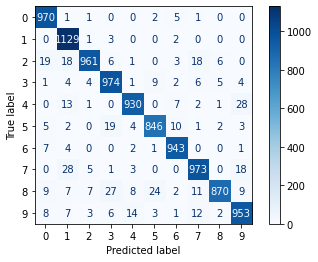

In [11]:
cmtx = confusion_matrix(test_target, predictions, labels=knn2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmtx, display_labels=knn2.classes_)
disp.plot(cmap='Blues')


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target, predictions)

0.9549

# Conclusion
Nous avons construit avec succès un classifieur KNN pour classer les chiffres manuscrits. Nous avons atteint une très bonne généralisation avec une précision de plus de 95 %.